Run this scipt in Google CoLab

This script uses a Neural Network to predict EF Rating given loss in US dollars,	length (miles), & width (yds)

In [1]:
# Import dependencies 
from pathlib import Path 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import & Inspect the Data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Loading data
tornado_df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Tornadoes Machine Learning & Analysis/Cleaned_Data/1950-2020_tornadoes_cleaned.csv")
tornado_df

,Timestamp,Year,Month,Day,State,Start_Lat,Start_Lon,End_Lat,End_Lon,EF,Injuries,Fatalities,Loss,Crop_Loss,Length,Width
0,1950-10-01 21:00:00,1950,10,1,OK,36.7300,-102.5200,36.8800,-102.3000,1,0,0,4000000.0,NaN,15.80,10
1,1950-10-09 02:15:00,1950,10,9,NC,34.1700,-78.6000,0.0000,0.0000,3,3,0,5000000.0,NaN,2.00,880
2,1950-11-20 02:20:00,1950,11,20,KY,37.3700,-87.2000,0.0000,0.0000,2,0,0,5000000.0,NaN,0.10,10
3,1950-11-20 04:00:00,1950,11,20,KY,38.2000,-84.5000,0.0000,0.0000,1,0,0,5000000.0,NaN,0.10,10
4,1950-11-20 07:30:00,1950,11,20,MS,32.4200,-89.1300,0.0000,0.0000,1,3,0,4000000.0,NaN,2.00,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67019,2020-09-01 16:24:00,2020,9,1,TN,36.3290,-89.4981,36.3517,-89.4729,0,0,0,NaN,2000.0,2.10,50
67020,2020-09-03 15:57:00,2020,9,3,MD,38.9480,-76.5695,38.9233,-76.4615,0,0,0,1250000.0,NaN,6.05,100
67021,2020-09-05 16:17:00,2020,9,5,CA,37.3500,-119.3400,37.5218,-119.3056,2,0,0,NaN,NaN,12.02,50
67022,2020-09-05 18:29:00,2020,9,5,CA,37.2500,-119.2000,37.2598,-119.1838,1,0,0,NaN,NaN,1.12,25


In [4]:
# # Loading data
# file_path = Path("../Cleaned_Data/1950-2020_tornadoes_cleaned.csv")
# tornado_df = pd.read_csv(file_path)

In [5]:
tornado_df.columns

Index(['Timestamp', 'Year', 'Month', 'Day', 'State', 'Start_Lat', 'Start_Lon',
       'End_Lat', 'End_Lon', 'EF', 'Injuries', 'Fatalities', 'Loss',
       'Crop_Loss', 'Length', 'Width'],
      dtype='object')

In [6]:
# drop na rows
tornado_df = tornado_df.dropna()

## Machine Learning: Neural Network using Keras

In [7]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy

In [8]:
!pip3 install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1. Define input data (X) and output data (y)

In [9]:
X = tornado_df.copy()
X = X.drop(['Timestamp', 'Year', 'Month', 'Day', 'State', 'Start_Lat', 'Start_Lon',
       'End_Lat', 'End_Lon', 'EF', 'Injuries', 'Fatalities','Crop_Loss'], axis=1)
X

,Loss,Length,Width
41903,1110000.0,17.00,120
49035,150000.0,0.46,50
50046,200000.0,13.93,200
50056,900000.0,17.26,360
50070,1000000.0,4.80,440
...,...,...,...
66897,20000.0,1.26,50
66918,35000.0,0.26,50
66919,45000.0,2.17,100
66971,150000.0,2.58,100


In [10]:
y = tornado_df["EF"].ravel()
y[:10]

array([2, 2, 2, 2, 3, 1, 1, 2, 0, 2])

### 2. Splitting into Train and Test sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =78)

### 3. Scale the input data (X)

In [12]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### 4. Define Deep Learning Model

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Rule of Thumb:
#   1. Number of Layers: Start with two hidden layers (this does not include the last layer).
#   2. Number of nodes (size) of intermediate layers: a number from the geometric progression of 2, e.g., 4, 8, 16, 32, … . 
#      The first layer should be around half of the number of input data features. The next layer size as half of the previous.

number_input_features = len(X.columns)
hidden_nodes_layer1 = 3
hidden_nodes_layer2 = 2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add( tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu") )

# Second hidden layer
nn.add( tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu") )

# Output layer
nn.add( tf.keras.layers.Dense(units=1, activation="sigmoid") )

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


### 5. Compile & Train the Model

In [14]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [15]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period = 5)

In [16]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.33, epochs=100,callbacks=[cp_callback])

Epoch 1/100
11/11 [==============================] - 1s 29ms/step - loss: 1.2897 - accuracy: 0.4807 - val_loss: 1.1905 - val_accuracy: 0.4850
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 1.2858 - accuracy: 0.4837 - val_loss: 1.1870 - val_accuracy: 0.4850
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 1.2818 - accuracy: 0.4837 - val_loss: 1.1835 - val_accuracy: 0.4850
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 1.2778 - accuracy: 0.4837 - val_loss: 1.1801 - val_accuracy: 0.4850
Epoch 5/100
 1/11 [=>............................] - ETA: 0s - loss: 0.7362 - accuracy: 0.6250
Epoch 5: saving model to checkpoints/weights.05.hdf5
11/11 [==============================] - 0s 8ms/step - loss: 1.2739 - accuracy: 0.4837 - val_loss: 1.1766 - val_accuracy: 0.4850
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 1.2699 - accuracy: 0.4837 - val_loss: 1.1730 - val_accuracy: 0.4850
Epoch 7/100
11/11

### 6. Plot Model Performance

In [17]:
print(fit_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


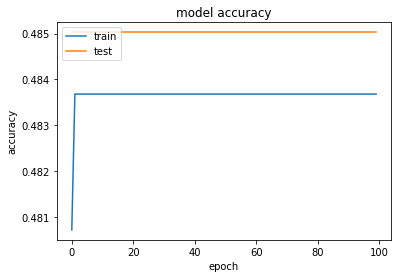

In [18]:
# summarize history for accuracy
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


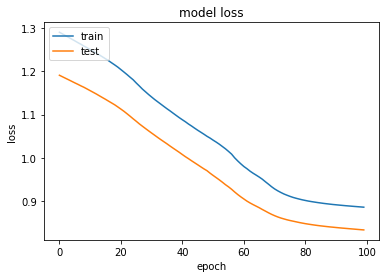

In [19]:
# summarize history for loss
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# Visualize the Neural Network
from ann_visualizer.visualize import ann_viz
ann_viz(nn,view=True, filename="NN_predictEF", title= "EF Neural Network")

### 6. Model Accuracy

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - loss: 0.9878 - accuracy: 0.3905 - 48ms/epoch - 8ms/step
Loss: 0.9877785444259644, Accuracy: 0.39053255319595337
